In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 

In [2]:
dir_path = os.path.dirname(os.path.realpath('__file__'))
print(dir_path)

D:\Sahil Gupta\Study Material\Programming (coding)\ML DL\Bank-Churn-Modelling-master


In [3]:
data=pd.read_csv(dir_path+"/Churn-Modelling.csv")
data.drop(labels=(['RowNumber','CustomerId','Surname']),axis=1,inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.shape

(10000, 11)

In [5]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


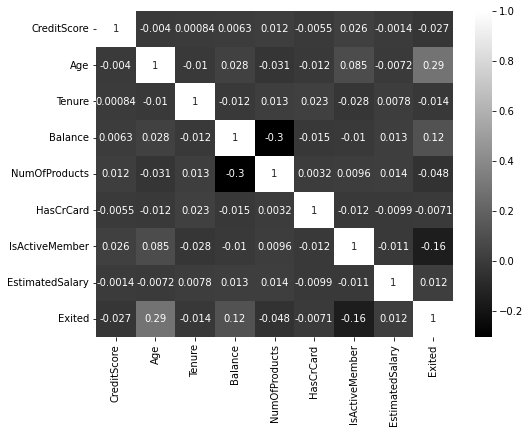

In [8]:
import seaborn as sb
ig,axis = plt.subplots(figsize=(8,6))
axis = sb.heatmap(data=data.corr(method='pearson',min_periods=1),annot=True,cmap="gray")

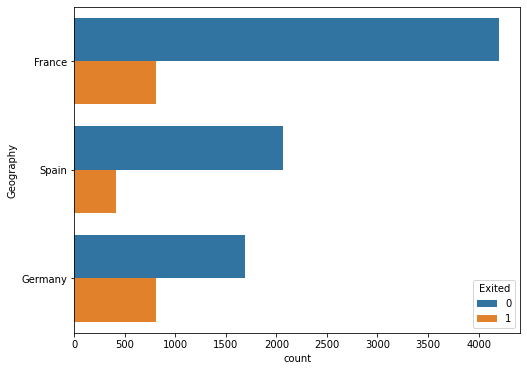

In [9]:
from itertools import chain
fig,aix = plt.subplots(figsize=(8,6))
aix = sb.countplot(hue='Exited',y='Geography',data=data)

In [10]:
array1 = np.array(data['Geography'])
array2 = np.array(data['Exited'])
index = len(array1)
france1 = 0
germany1 = 0
spain1 = 0
france0 = 0
germany0 = 0
spain0 = 0

for i in range(index):
    if(array1[i]=='France' and array2[i]==1) :
        france1 +=1
    elif (array1[i]=='Germany' and array2[i]==1):
        germany1 +=1
    elif (array1[i]=='Spain' and array2[i]==1):
        spain1 +=1
    elif(array1[i]=='France' and array2[i]==0):
        france0 +=1
    elif (array1[i]=='Germany' and array2[i]==0):
        germany0 +=1
    elif (array1[i]=='Spain' and array2[i]==0):
        spain0 +=1


print((france1/(france0+france1)*100));print("% France")
print((spain1/(spain0+spain1)*100));print("% Spain")
print((germany1/(germany0+germany1)*100));print("% Germany")

16.15476665337056
% France
16.673395236172787
% Spain
32.44320446392985
% Germany


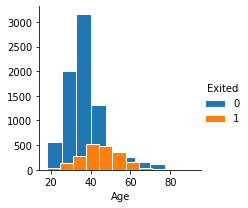

In [11]:
g = sb.FacetGrid(data,hue = 'Exited')
g.map(plt.hist,'Age',edgecolor="w").add_legend()

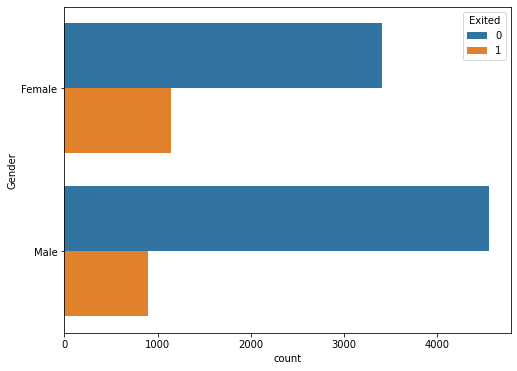

In [12]:
fig,aix = plt.subplots(figsize=(8,6))
aix = sb.countplot(hue='Exited',y='Gender',data=data)

In [13]:
male1=0
fem0=0
male0=0
fem1=0
array1 = np.array(data['Gender'])

for i in range(index):
    if(array1[i]=='Male' and array2[i]==1) :
        male1 +=1
    elif (array1[i]=='Female' and array2[i]==1):
        fem1 +=1
    elif (array1[i]=='Male' and array2[i]==0):
        male0 +=1
    elif(array1[i]=='Female' and array2[i]==0):
        male0 +=1

print((male1/(male1+male0)*100));print("% male")
print((fem1/(fem1+fem0)*100));print("% female")

10.134296354813227
% male
100.0
% female


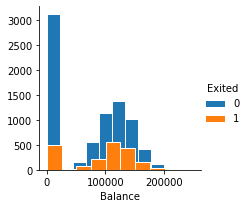

In [14]:
g = sb.FacetGrid(data,hue = 'Exited')
g.map(plt.hist,'Balance',edgecolor="w").add_legend()

# preprocessing

In [15]:
lable =data['Exited']
data.drop(labels=(['Exited']),axis=1,inplace=True)
Features=data



In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
Features = Features.apply(le.fit_transform)
Features.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,228,0,0,24,2,0,0,1,1,5068
1,217,2,0,23,1,743,0,0,1,5639
2,111,0,0,24,8,5793,2,1,0,5707
3,308,0,0,21,1,0,1,0,0,4704
4,459,2,0,25,2,3696,0,1,1,3925


In [17]:
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(Features)

# 3. Transform
onehotlabels = enc.transform(Features).toarray()
onehotlabels.shape

(10000, 16935)

In [18]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(onehotlabels)


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, lable, test_size=0.2)
print(len(x_train), len(x_test))


8000 2000


In [20]:
classifi = SVC()
classifi.fit(x_train,y_train)

In [ ]:
y_pred = classifi.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(acc)

0.7955


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(x_train, y_train)
y=model.predict(x_test)
acc = accuracy_score(y_test, y)

In [ ]:
print(acc)

0.851
